# Operador de Canny

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
from skimage.filters import sobel_h, sobel_v, sobel

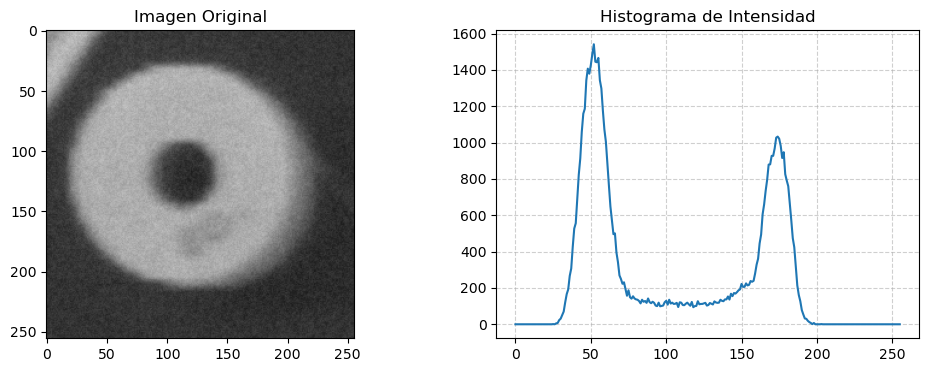

In [2]:
rondeleImg = cv2.imread("images/RONDELLE.png", 0)
hist = cv2.calcHist([rondeleImg], [0], None, [256], [0, 256])

figure, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].imshow(rondeleImg, cmap='gray', vmin=0, vmax=255)
axes[0].set_title("Imagen Original")


axes[1].plot(hist)
axes[1].set_title("Histograma de Intensidad")
axes[1].grid(True, linestyle='--', alpha=0.6)

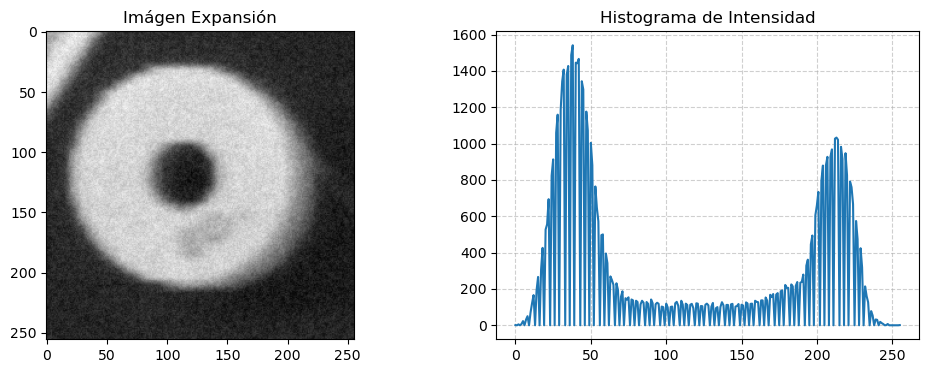

In [3]:
rescaled_img = exposure.rescale_intensity(rondeleImg, in_range=(np.min(rondeleImg), np.max(rondeleImg)), out_range=(0,255)).astype(np.uint8)
hist = cv2.calcHist([rescaled_img], [0], None, [256], [0, 256])

figure, axes = plt.subplots(1, 2, figsize=(12, 4))

axes[0].imshow(rescaled_img, cmap='gray', vmin=0, vmax=255)
axes[0].set_title("Imágen Expansión")


axes[1].plot(hist)
axes[1].set_title("Histograma de Intensidad")
axes[1].grid(True, linestyle='--', alpha=0.6)

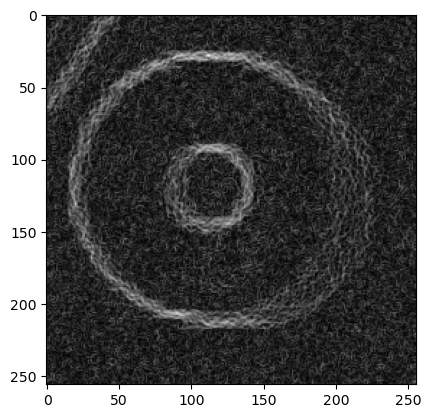

In [4]:
img_s = sobel(rescaled_img)
plt.imshow(img_s, cmap="gray")

*Operador de Canny*

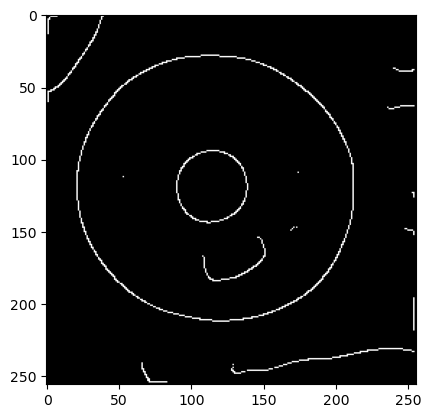

In [5]:
from skimage.feature import canny

edges = canny(rescaled_img, sigma=10, low_threshold=0, high_threshold=1)

plt.imshow(edges, cmap='gray')

Lo que podemos ver es que la imágen seleccionó los bordes de la imágen sin mucho detalle, una desviación alta hizo que se seleccionara solo lo que era muy evidente que era un borde, aún así logró colarse algo de ruido en este proceso.

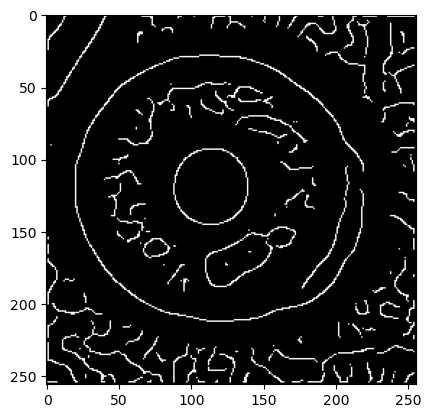

In [6]:
edges2 = canny(rescaled_img, sigma=5, low_threshold=0, high_threshold=1)

plt.imshow(edges2, cmap='gray')

En este caso se puede ver que fueron seleccionados muchos más bordes, no obstante en la imágen original eran ruido. Esto se debe a que al poner una desviación estándar mucho más baja gran parte del ruido se toma como borde.

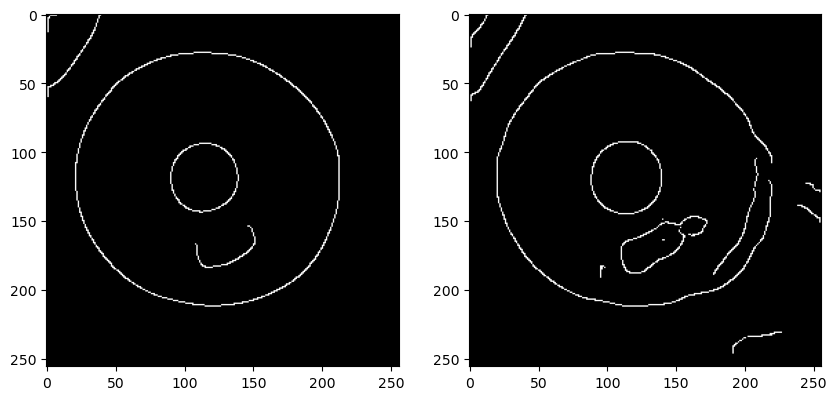

: 

In [ ]:
edges = canny(rescaled_img, sigma=10, low_threshold=0, high_threshold=5)
edges2 = canny(rescaled_img, sigma=5, low_threshold=0, high_threshold=5)

fig, axs = plt.subplots(1, 2, figsize=(10, 10))
axs[0].imshow(edges, cmap='gray')
axs[1].imshow(edges2, cmap='gray')

Haber seleccionado un umbral más alto nos permite eliminar parte del ruido que se había introducido en la imágen, esto se debe a que se está diciendo que el umbral para esta seguro de que un píxel si hace parte del borde con total seguridad es mucho más alto.